In [4]:
import numpy as np
from pylab import *
from craco.cardcap import CardcapFile
from astropy.io import fits

%matplotlib notebook

In [5]:
# problem is only some of the cards got to the full 550 MB
!ls -lh data/SB40178/*v2*.fits


-rw-rw-r-- 1 ban115 ban115 217M May 30 21:32 data/SB40178/vela_b0_v2_b07_c01.fits
-rw-rw-r-- 1 ban115 ban115 218M May 30 21:32 data/SB40178/vela_b0_v2_b07_c02.fits
-rw-rw-r-- 1 ban115 ban115 950K May 30 21:32 data/SB40178/vela_b0_v2_b07_c03.fits
-rw-rw-r-- 1 ban115 ban115 506M May 30 21:33 data/SB40178/vela_b0_v2_b07_c04.fits
-rw-rw-r-- 1 ban115 ban115 407M May 30 21:32 data/SB40178/vela_b0_v2_b07_c05.fits
-rw-rw-r-- 1 ban115 ban115  17K May 30 21:32 data/SB40178/vela_b0_v2_b07_c06.fits
-rw-rw-r-- 1 ban115 ban115 554M May 30 21:33 data/SB40178/vela_b0_v2_b07_c07.fits
-rw-rw-r-- 1 ban115 ban115 950K May 30 21:32 data/SB40178/vela_b0_v2_b07_c08.fits
-rw-rw-r-- 1 ban115 ban115  17K May 30 21:32 data/SB40178/vela_b0_v2_b07_c09.fits
-rw-rw-r-- 1 ban115 ban115 550M May 30 21:33 data/SB40178/vela_b0_v2_b07_c10.fits
-rw-rw-r-- 1 ban115 ban115 550M May 30 21:33 data/SB40178/vela_b0_v2_b07_c11.fits
-rw-rw-r-- 1 ban115 ban115 550M May 30 21:33 data/SB40178/vela_b0_v2_b07_c12.fits
-rw-rw-r-- 1 ban

In [15]:
cc = [CardcapFile(f'data/SB40178/v6/vela_b0_v6_b07_c{c:02d}.fits') for c in range(3,12+1)]
pkts = [ccf.load_packets() for ccf in cc]

In [16]:
for ccf, pk in zip(cc, pkts):
    h = ccf.mainhdr
    p1 = pk[0]
    print('\t'.join(map(str, (h['CARD'], h['NOWSTR'], len(pk), p1['version'],p1['frame_id'], hex(p1['frame_id']), p1['bat'], hex(p1['bat']),p1['beam_number'], p1['sample_number'])))),

3	2022-05-30T07:03:04.844	256	2004071455	74117120	0x46af000	602960924697	0x8c63459019	0	0
4	2022-05-30T07:03:04.844	125952	2004071455	74117120	0x46af000	602960924697	0x8c63459019	0	0
5	2022-05-30T07:03:04.844	153088	2004071455	74172416	0x46bc800	602963910681	0x8c63732019	0	0
6	2022-05-30T07:03:04.844	1	16777344	72057594037928064	0x100000000000080	72057594037928064	0x100000000000080	1	1
7	2022-05-30T07:03:04.844	154368	2004071455	74117120	0x46af000	602960924697	0x8c63459019	0	0
8	2022-05-30T07:03:04.844	256	2004071455	74117120	0x46af000	602960924697	0x8c63459019	0	0
9	2022-05-30T07:03:04.845	1	16777344	72057594037928064	0x100000000000080	72057594037928064	0x100000000000080	1	1
10	2022-05-30T07:03:04.845	152064	2004071455	74117120	0x46af000	602960924697	0x8c63459019	0	0
11	2022-05-30T07:03:04.844	26112	2004071455	74158080	0x46b9000	602963136536	0x8c63675018	0	0
12	2022-05-30T07:03:04.844	26368	2004071455	74158080	0x46b9000	602963136536	0x8c63675018	0	0


In [17]:
pk[0]['frame_id']

74158080

<IPython.core.display.Javascript object>


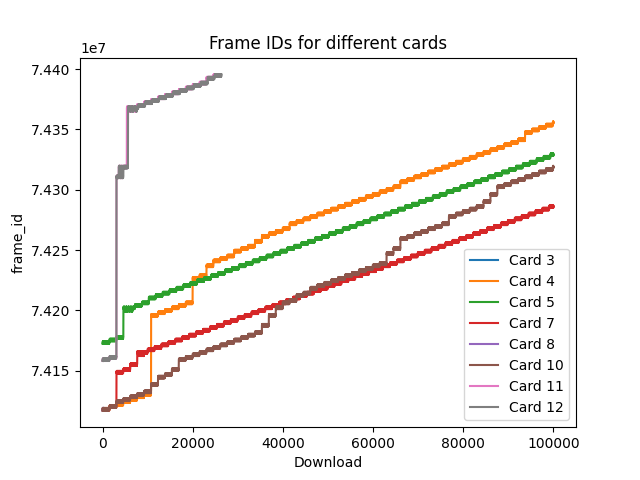

Text(0.5, 1.0, 'Frame IDs for different cards')

In [18]:
figure()
n = 100000
for ip, p in enumerate(pkts):
    if p['version'][0] == 2004071455:
        card = cc[ip].mainhdr['CARD']        
        plot(p['frame_id'][:n], label=f'Card {card}',)
                    

legend()
xlabel('Download')
ylabel('frame_id')
title('Frame IDs for different cards')

In [19]:
p.dtype

dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (1, 465, 2, 2))])

In [20]:
cc[0].mainhdr

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3752 / length of dimension 1                          
NAXIS2  =                    1 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   12 / number of table fields                         
TTYPE1  = 'frame_id'                                                            
TFORM1  = 'K       '                                                            
TZERO1  =                    0                                                  
TTYPE2  = 'bat     '                                                            
TFORM2  = 'K       '        

<IPython.core.display.Javascript object>


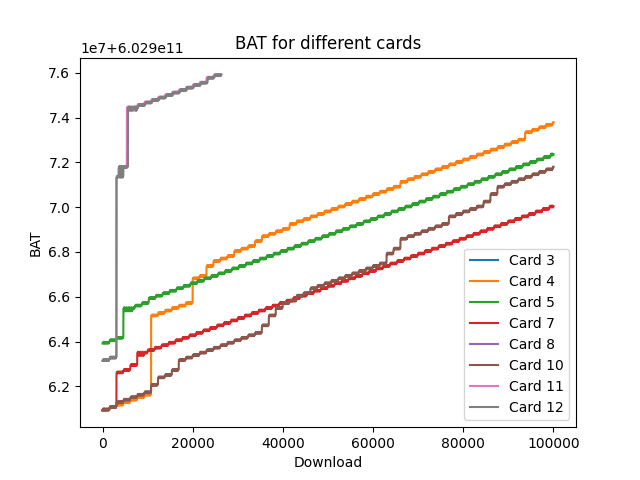

Text(0.5, 1.0, 'BAT for different cards')

In [12]:
figure()
n = 100000
for ip, p in enumerate(pkts):
    if p['version'][0] == 2004071455:
        card = cc[ip].mainhdr['CARD']
        plot(p['bat'][:n], label=f'Card {card}')

legend()
xlabel('Download')
ylabel('BAT')
title('BAT for different cards')

In [13]:
start_bats = np.array([p['bat'][0] for p in pkts])
start_frameid = np.array([p['frame_id'][0] for p in pkts])

In [14]:
start_bats - start_bats[0]

array([                0,                 0,           2985984,
       72056991077003367,                 0,                 0,
       72056991077003367,                 0,           2211839,
                 2211839], dtype=uint64)

In [139]:
start_frameid - start_frameid[0]

array([                0,                 0,             55296,
       72057593963810944,                 0,                 0,
       72057593963810944,                 0,             40960,
                   40960], dtype=uint64)